In [1]:
import networkx as nx
import pandas as pd

# Definitions


In [2]:
definitions = pd.read_json('../../definitions.json', typ='split')
using_nodes = ["Gene","Compound","Disease"]

#metanodes -"Gene","Compound","Disease"
for node in using_nodes:
    print(f'{node} : {definitions["metanodes"].get(node)}')

Gene : Protein-coding human genes. From Entrez Gene.
Compound : Approved small molecule compounds with documented chemical structures. From DrugBank.
Disease : Complex diseases, selected to be distinct and specific enough to be clinically relevant yet general enough to be well annotated. From Disease Ontology.


In [3]:
not_using_nodes = [node for node in definitions["metanodes"].keys() if node not in using_nodes]

In [4]:
using_edges = []

for edge in definitions["metaedges"].keys():
    e = edge.split('–')
    if (e[0] not in not_using_nodes) and (e[-1] not in not_using_nodes):
        using_edges.append(edge.replace('–',' - '))
        print(f'{edge} : {definitions["metaedges"].get(edge)}','\n')

Compound–binds–Gene : The Compound physically binds to the Gene's protein product according to BindingDB, DrugBank, or DrugCentral 

Compound–downregulates–Gene : The Gene is under-expressed in samples exposed to the Compound according to a consensus signature from LINCS L1000 

Compound–palliates–Disease : The Compound is a symptomatic indication for the Disease (i.e. the Compound treats a significant symptom of the Disease) according to PharmacotherapyDB 

Compound–resembles–Compound : The Compounds are chemical similar to each other: Their extended connectivity fingerprints have a Dice coefficient ≥ 0.5. 

Compound–treats–Disease : The Compound is a disease-modifying indication for the Disease (i.e. the Compound therapeutically changes the underlying or downstream biology of the Disease) according to PharmacotherapyDB 

Compound–upregulates–Gene : The Gene is over-expressed in samples exposed to the Compound according to a consensus signature from LINCS L1000 

Disease–associates–Ge

# nodes


In [5]:
metanodes = pd.read_csv('../../metanodes.tsv', sep='\t')
metanodes.query('metanode in @using_nodes')

,metanode,abbreviation,metaedges,nodes,unconnected_nodes
3,Compound,C,8,1552,14
4,Disease,D,8,137,1
5,Gene,G,16,20945,1800


In [6]:
nodes = pd.read_csv('../../hetionet-v1.0-nodes.tsv', sep='\t')

In [7]:
nodes.query('kind in @using_nodes', inplace=True)

# nodes['id'] = nodes['id'].str.split('::').str[-1]

In [8]:
nodes

#### id is the node identifier prepended with the node type plus :: as a separator. 
#### name is the node name. 
#### kind is the node type.

,id,name,kind
13174,Compound::DB00014,Goserelin,Compound
13175,Compound::DB00035,Desmopressin,Compound
13176,Compound::DB00050,Cetrorelix,Compound
13177,Compound::DB00091,Cyclosporine,Compound
13178,Compound::DB00093,Felypressin,Compound
...,...,...,...
35803,Gene::9991,PTBP3,Gene
35804,Gene::9992,KCNE2,Gene
35805,Gene::9993,DGCR2,Gene
35806,Gene::9994,CASP8AP2,Gene


In [9]:
compound = nodes[nodes['id'].str.contains('Compound')]['id'].to_list()
gene = nodes[nodes['id'].str.contains('Gene')]['id'].to_list()
disease = nodes[nodes['id'].str.contains('Disease')]['id'].to_list()

# edges

In [10]:
metaedges = pd.read_csv('../../metaedges.tsv', sep='\t')
metaedges.query('metaedge in @using_edges | metaedge == "Gene > regulates > Gene"',inplace=True)
metaedges

,metaedge,abbreviation,edges,source_nodes,target_nodes,unbiased
3,Compound - binds - Gene,CbG,11571,1389,1689,0
5,Compound - downregulates - Gene,CdG,21102,734,2880,21102
6,Compound - palliates - Disease,CpD,390,221,50,0
7,Compound - resembles - Compound,CrC,6486,1042,1054,6486
8,Compound - treats - Disease,CtD,755,387,77,0
9,Compound - upregulates - Gene,CuG,18756,703,3247,18756
10,Disease - associates - Gene,DaG,12623,134,5392,1284
11,Disease - downregulates - Gene,DdG,7623,44,5745,7623
14,Disease - resembles - Disease,DrD,543,112,106,0
15,Disease - upregulates - Gene,DuG,7731,44,5630,7731


In [11]:
edge_file = '../../edges.sif'
edges = pd.read_csv(edge_file, sep='\t',)

In [12]:
edges = pd.merge(metaedges[['metaedge','abbreviation']], edges, left_on='abbreviation', right_on='metaedge')
edges.drop('metaedge_y', axis=1, inplace=True)
edges

,metaedge_x,abbreviation,source,target
0,Compound - binds - Gene,CbG,Compound::DB00514,Gene::1136
1,Compound - binds - Gene,CbG,Compound::DB00686,Gene::2246
2,Compound - binds - Gene,CbG,Compound::DB00786,Gene::4317
3,Compound - binds - Gene,CbG,Compound::DB01209,Gene::4988
4,Compound - binds - Gene,CbG,Compound::DB01588,Gene::2560
...,...,...,...,...
562101,Gene > regulates > Gene,Gr>G,Gene::5184,Gene::8659
562102,Gene > regulates > Gene,Gr>G,Gene::22818,Gene::5613
562103,Gene > regulates > Gene,Gr>G,Gene::29888,Gene::5467
562104,Gene > regulates > Gene,Gr>G,Gene::5894,Gene::595


# label

In [13]:
connected_compound_disease = edges[(edges['source'].str.contains('Compound')) & (edges['target'].str.contains('Disease'))]
connected_compound_disease

,metaedge_x,abbreviation,source,target
32673,Compound - palliates - Disease,CpD,Compound::DB01175,Disease::DOID:3312
32674,Compound - palliates - Disease,CpD,Compound::DB00321,Disease::DOID:7148
32675,Compound - palliates - Disease,CpD,Compound::DB00176,Disease::DOID:594
32676,Compound - palliates - Disease,CpD,Compound::DB01037,Disease::DOID:10652
32677,Compound - palliates - Disease,CpD,Compound::DB00945,Disease::DOID:9074
...,...,...,...,...
40299,Compound - treats - Disease,CtD,Compound::DB00860,Disease::DOID:8893
40300,Compound - treats - Disease,CtD,Compound::DB01265,Disease::DOID:2043
40301,Compound - treats - Disease,CtD,Compound::DB01030,Disease::DOID:1324
40302,Compound - treats - Disease,CtD,Compound::DB01101,Disease::DOID:5041


In [14]:
connected_compound_disease.drop(['metaedge_x', 'abbreviation'],axis=1, inplace=True)
connected_compound_disease = connected_compound_disease.assign(label = 1)
connected_compound_disease

C:\Users\young\AppData\Local\Temp\ipykernel_16080\2249382706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connected_compound_disease.drop(['metaedge_x', 'abbreviation'],axis=1, inplace=True)


,source,target,label
32673,Compound::DB01175,Disease::DOID:3312,1
32674,Compound::DB00321,Disease::DOID:7148,1
32675,Compound::DB00176,Disease::DOID:594,1
32676,Compound::DB01037,Disease::DOID:10652,1
32677,Compound::DB00945,Disease::DOID:9074,1
...,...,...,...
40299,Compound::DB00860,Disease::DOID:8893,1
40300,Compound::DB01265,Disease::DOID:2043,1
40301,Compound::DB01030,Disease::DOID:1324,1
40302,Compound::DB01101,Disease::DOID:5041,1


In [15]:
connected_compound_disease_list = list(zip(connected_compound_disease['source'],connected_compound_disease['target']))

# 그래프 생성

In [16]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(compound,group='compound', weight=2)
G.add_nodes_from(gene,group='gene', weight=1)
G.add_nodes_from(disease,group='disease', weight=2)

In [17]:
# 엣지 추가 및 가중치 부여
for _, edge in edges.iterrows():
    source = edge['source']
    target = edge['target']
    weight = 2 if G.nodes[source]['group'] == 'compound' and G.nodes[target]['group'] == 'disease' else 1
    G.add_edge(source, target, weight=weight)

In [18]:
print(G['Compound::DB00514']['Gene::1136'])

{'weight': 1}


In [19]:
print(G['Compound::DB01175']['Disease::DOID:3312'])

{'weight': 2}


# Node2Vec

In [20]:
from node2vec import Node2Vec

# Node2Vec 모델 생성 및 학습
node2vec = Node2Vec(G, dimensions=60, walk_length=30, num_walks=200, workers=4, p=2.0, q=0.5)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/22634 [00:00<?, ?it/s]

In [21]:
# 노드 임베딩 확인
embedding = model.wv[compound[0]]
print(f'Embedding for Node:, {compound[0]}, \n {embedding}')

Embedding for Node:, Compound::DB00014, 
 [ 0.04343856 -0.44883832 -0.16358109 -0.2432103  -0.2674877   0.13538566
  0.05465844 -0.28844267 -0.21094145  0.22782657 -0.01014596 -0.3044157
 -0.7556696   0.53436106 -0.0673588   0.1947739   0.34663293  0.61259186
  0.2929407   1.0794233   0.45198664 -0.14492078  0.47498208 -0.01666706
 -0.740761   -0.569283   -0.01345755  0.15049297  0.13389562  0.82881737
  0.4692751   0.7598977   0.77105457 -0.38096425  0.31525734  0.59978324
  0.1040436  -0.5225409   0.12727499  0.20670637  0.42284116  0.3691364
 -0.0485302  -0.03934234  0.09671438 -0.17286097 -0.8302089   0.23297837
  0.14676164  0.12470373  0.30691606  0.3528305  -0.62448853  0.03662655
  0.31466302  0.651862    0.36077365  0.40322354  0.47581697 -0.68147415]


In [22]:
embedding = model.wv[disease[0]]
print(f'Embedding for Node:, {disease[0]}, \n {embedding}')

Embedding for Node:, Disease::DOID:0050156, 
 [-0.23509187 -0.5679391   0.32561624 -0.19366084 -0.24605559 -0.12917502
  0.17519014  0.4065862  -0.07707714 -0.6252837   0.16261582 -0.08042093
 -0.27759242  0.40682486 -0.05399834 -0.0256337   0.46963775  0.21701218
 -0.07219476  0.20139505  0.00896689  0.22030492 -0.01479196 -0.27352777
 -0.06151601 -0.13355234  0.04865434  0.10190221  0.15674624  0.16501829
  0.04543721 -0.21200548  0.6918119   0.550471    0.55374163  0.37474892
 -0.3902387  -0.12721707  0.00158134  0.17662205 -0.08509557 -0.19977935
 -0.5383035  -0.18466605 -0.04512098 -0.2873258  -0.04733789  0.58700585
  0.16975218 -0.22357371  0.16847758 -0.9397557  -0.2885075  -0.30718905
 -0.26123777  0.25891098 -0.43525591 -0.01907161  0.01450944 -0.5572354 ]


# 데이터

In [23]:
#cartesian product
df1 = pd.DataFrame({'source':compound})
df2 = pd.DataFrame({'target':disease})

compound_disease = pd.merge(df1.assign(key=1),df2.assign(key=1), on='key').drop('key', axis=1)

#label
compound_disease = pd.merge(compound_disease, connected_compound_disease, how='outer')
compound_disease = compound_disease.fillna(0)
compound_disease

,source,target,label
0,Compound::DB00014,Disease::DOID:0050156,0.0
1,Compound::DB00014,Disease::DOID:0050425,0.0
2,Compound::DB00014,Disease::DOID:0050741,0.0
3,Compound::DB00014,Disease::DOID:0050742,0.0
4,Compound::DB00014,Disease::DOID:0060073,0.0
...,...,...,...
212619,Compound::DB09028,Disease::DOID:9744,0.0
212620,Compound::DB09028,Disease::DOID:9835,0.0
212621,Compound::DB09028,Disease::DOID:986,0.0
212622,Compound::DB09028,Disease::DOID:9917,0.0


In [24]:
# import numpy as np
# compound_embedding = [np.array(model.wv[com]) for com in compound]
# compound_disease['source'] = compound_disease['source'].replace({'Compound::DB00014',compound_embedding[0]})


In [25]:
compound_disease_label = []
for com in compound:
    for dis in disease:
        val = []
        val.append(com)
        val.append(dis)
        tup = (com,dis)
        if tup in connected_compound_disease_list:
            val.append(1)
        else:
            val.append(0)
        compound_disease_label.append(val)

In [26]:
import numpy as np

input = []
for data in compound_disease_label:
    input.append(np.vstack([model.wv[data[0]], model.wv[data[1]]]).reshape(120,))


# Classification

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=0)

lr.fit(X_train,y_train)	

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=0)

In [29]:
print(lr.coef_ ,'\n' ,lr.intercept_)

[[ 1.12304895  0.90683686 -0.73879974  0.03391683 -2.28514177  1.73130401
  -1.69576587  0.55918626  0.30651752  1.12778727 -0.6283639  -0.89037752
  -0.41386401  0.84852496  2.49903076 -0.52488231 -0.48037944 -0.85245494
   0.33623104  1.10135749 -1.63666432  0.78893373  1.94877905  0.22093236
  -1.39234353 -0.101168    0.73138667 -0.44219796  0.57807687  0.25660205
  -0.32284844  1.06662589 -0.86010593  0.43255275 -2.24802022  1.48796343
  -0.15407085  1.52830945  2.6336134  -0.7809416   0.40755414  1.95525922
  -0.39753469  0.02420288 -0.56176174  1.28316682 -0.55096179  0.10042342
  -1.00453998 -1.72837278 -1.20419768  2.11045487 -0.23055209 -0.63004731
   1.62954187 -1.11464425 -0.79639307  0.78480434 -0.64394053  1.10690325
   1.41802916 -1.73189171 -4.59393851  0.6040553  -0.16558233  0.37667292
   1.35828036 -0.40470696  1.14357878  1.29100595  2.13378923  1.81024677
   0.04722759 -1.14329354 -0.39025936 -0.31010852  2.81128866  2.02143033
  -1.98649671 -2.6360423   0.34195236 

In [30]:
lr.score(X_test,y_test)
															    

0.8100426412491377

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 테스트 세트에 대한 예측
y_pred = lr.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8100426412491377
Precision: 0.023707419694150012
Recall: 0.8517441860465116
F1 Score: 0.04613083523577108
Confusion Matrix:
[[51378 12066]
 [   51   293]]


In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# XGBoost 모델 생성 및 학습
xg1 = xgb.XGBClassifier(random_state=0)
xg1.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = xg1.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9955163980686023
Precision: 0.7685185185185185
Recall: 0.24127906976744187
F1 Score: 0.36725663716814155
Confusion Matrix:
[[63419    25]
 [  261    83]]


In [33]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# 언더샘플링 적용
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# XGBoost 모델 생성 및 학습
xg2 = xgb.XGBClassifier(random_state=0)
xg2.fit(X_resampled, y_resampled)

# 테스트 세트에 대한 예측
y_pred = xg2.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8657741267950084
Precision: 0.03623024830699774
Recall: 0.9331395348837209
F1 Score: 0.0697522816166884
Confusion Matrix:
[[54905  8539]
 [   23   321]]


In [99]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

# 오버샘플링 적용
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# XGBoost 모델 생성 및 학습
xg3 = xgb.XGBClassifier(random_state=0)
xg3.fit(X_resampled, y_resampled)

# 테스트 세트에 대한 예측
y_pred = xg3.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9928983507869819
Precision: 0.39579349904397704
Recall: 0.6017441860465116
F1 Score: 0.4775086505190311
Confusion Matrix:
[[63128   316]
 [  137   207]]


In [35]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.model_selection import train_test_split

# # 데이터 분할
# X_train, X_test, y_train, y_test =\
#     train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

# # 오버샘플링 적용
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# # XGBoost 모델 정의
# xg_model = xgb.XGBClassifier(random_state=0)

# # 탐색할 하이퍼파라미터 설정
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [50, 100, 200],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
# }

# # GridSearchCV를 사용하여 모델 튜닝
# grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, scoring='f1', cv=3)
# grid_search.fit(X_resampled, y_resampled)

# # 최적의 하이퍼파라미터 출력
# print("Best Parameters:", grid_search.best_params_)

# # 최적의 모델로 예측
# y_pred = grid_search.predict(X_test)

# # 평가 지표 계산
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# # 결과 출력
# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")
# print(f"Confusion Matrix:\n{conf_matrix}")

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.9918479964883677
Precision: 0.34982935153583616
Recall: 0.5959302325581395
F1 Score: 0.4408602150537634
Confusion Matrix:
[[63063   381]
 [  139   205]]


# Evaluation

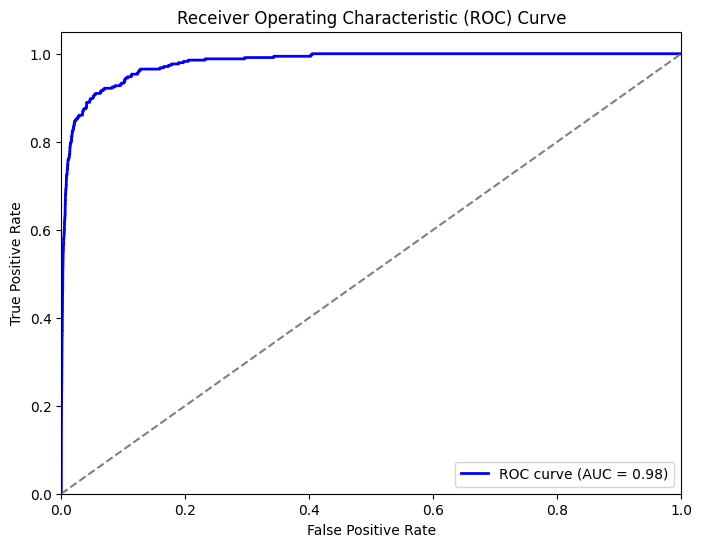

In [36]:
import sklearn.metrics as sm
import matplotlib.pyplot as plt

y_probs = xg3.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = sm.roc_curve(y_test, y_probs)

# AUC (Area Under the ROC Curve) 계산
auc = sm.roc_auc_score(y_test, y_probs)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 약물재창출

In [105]:
#Disease::DOID:1612 = breast cancer
import numpy as np
input2 = []
ddf = pd.DataFrame(columns=['compound', 'disease', 'label'])
for data in compound_disease_label:
    if data[1]=='Disease::DOID:1612': 
        input2.append(np.vstack([model.wv[data[0]], model.wv['Disease::DOID:1612']]).reshape(120,))
        ddf = pd.concat([ddf, pd.DataFrame({'compound': [data[0]], 'disease': ['Disease::DOID:1612'], 'label': 0})], ignore_index=True)

prediction = xg3.predict(input2)

df = compound_disease[compound_disease['target'] == 'Disease::DOID:1612']
df['label'] = prediction

# 예측한 결과, 'label' 열 값이 1인 행 출력
selected_rows = df[df['label'] == 1]

# 정답 label이 1인 conpound 출력
rows = connected_compound_disease[connected_compound_disease['target']=='Disease::DOID:1612']
rows_list = rows['source'].tolist()

compound_list = []
for i in selected_rows['source']:
    if i not in rows_list:
        compound_list.append(i)

#에측결과에서 실제결과 값을 제외한 결과
nodes[nodes['id'].isin(compound_list)]

C:\Users\young\AppData\Local\Temp\ipykernel_6472\1264855327.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = prediction


,id,name,kind
13177,Compound::DB00091,Cyclosporine,Compound
13245,Compound::DB00184,Nicotine,Compound
13302,Compound::DB00242,Cladribine,Compound
13364,Compound::DB00305,Mitomycin,Compound
13448,Compound::DB00396,Progesterone,Compound
13493,Compound::DB00444,Teniposide,Compound
13528,Compound::DB00482,Celecoxib,Compound
13545,Compound::DB00499,Flutamide,Compound
13572,Compound::DB00530,Erlotinib,Compound
13581,Compound::DB00541,Vincristine,Compound


In [106]:
# 테스트 세트에 대한 예측 확률 얻기
y_probabilities = xg3.predict_proba(input2)[:, 1]  # 1에 대한 예측 확률을 얻습니다.

# 'label_prob' 열에 예측 확률 추가
df['label_prob'] = y_probabilities.round(4)

# label_prob를 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='label_prob', ascending=False)

df_sorted

C:\Users\young\AppData\Local\Temp\ipykernel_6472\2087309696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_prob'] = y_probabilities.round(4)


,source,target,label,label_prob
141168,Compound::DB01185,Disease::DOID:1612,1,0.9984
31979,Compound::DB00351,Disease::DOID:1612,1,0.9981
202270,Compound::DB08871,Disease::DOID:1612,1,0.9970
23485,Compound::DB00286,Disease::DOID:1612,1,0.9961
122399,Compound::DB01042,Disease::DOID:1612,1,0.9956
...,...,...,...,...
149799,Compound::DB01249,Disease::DOID:1612,0,0.0000
93492,Compound::DB00821,Disease::DOID:1612,0,0.0000
92944,Compound::DB00817,Disease::DOID:1612,0,0.0000
92670,Compound::DB00815,Disease::DOID:1612,0,0.0000


In [107]:
# source 열의 값이 rows_list에 있는 행을 삭제
df_sorted = df_sorted[~df_sorted['source'].isin(rows_list)]

# label_prob 값이 큰 상위 10개의 행 출력
top_10_rows = df_sorted.nlargest(10, 'label_prob')
top_10_rows

,source,target,label,label_prob
120892,Compound::DB01030,Disease::DOID:1612,1,0.9850
87053,Compound::DB00773,Disease::DOID:1612,1,0.9718
82806,Compound::DB00741,Disease::DOID:1612,1,0.9487
112809,Compound::DB00970,Disease::DOID:1612,1,0.9365
68421,Compound::DB00635,Disease::DOID:1612,1,0.9297
118015,Compound::DB01008,Disease::DOID:1612,1,0.8933
55817,Compound::DB00541,Disease::DOID:1612,1,0.8836
43761,Compound::DB00444,Disease::DOID:1612,1,0.8342
48556,Compound::DB00482,Disease::DOID:1612,1,0.8157
50885,Compound::DB00499,Disease::DOID:1612,1,0.8037


In [113]:
top_10_rows['source'] = top_10_rows['source'].map(nodes.set_index('id')['name'])
top_10_rows['target'] = 'breast cancer'
top_10_rows

,source,target,label,label_prob
120892,Topotecan,breast cancer,1,0.9850
87053,Etoposide,breast cancer,1,0.9718
82806,Hydrocortisone,breast cancer,1,0.9487
112809,Dactinomycin,breast cancer,1,0.9365
68421,Prednisone,breast cancer,1,0.9297
118015,Busulfan,breast cancer,1,0.8933
55817,Vincristine,breast cancer,1,0.8836
43761,Teniposide,breast cancer,1,0.8342
48556,Celecoxib,breast cancer,1,0.8157
50885,Flutamide,breast cancer,1,0.8037


In [114]:
# # top_10_rows를 CSV 파일로 저장
# top_10_rows.to_csv('xgboost_drug.csv', index=False)

# -> xg3 모델에 질병이 breast cancer인 input2를 넣었을 때, label이 1이라고 예측되는 결과에 정답 label이 1인 행을 제외하고 label_prob값이 높은 상위 10개를 출력함.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=42, stratify=compound_disease['label'])

X_subtrain, X_val, y_subtrain, y_val =\
    train_test_split(X_train, y_train, test_size=0.3, random_state=42)

from sklearn.svm import SVC

svm = SVC(class_weight='balanced', kernel='rbf', probability=True)  # kernel SVM
svm.fit(X_subtrain, y_subtrain)

SVC(class_weight='balanced', probability=True)

In [30]:
from sklearn.metrics import precision_score, recall_score, classification_report

y_proba = svm.predict_proba(X_test)[:, 1]

# 임계값을 조정
threshold = 0.3  # 임계값 설정
y_pred_adjusted = (y_proba > threshold).astype(int)

# 조정된 예측
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     63444
         1.0       0.56      0.61      0.59       344

    accuracy                           1.00     63788
   macro avg       0.78      0.81      0.79     63788
weighted avg       1.00      1.00      1.00     63788



In [43]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_adjusted)
print(accuracy)

0.9953125979808114


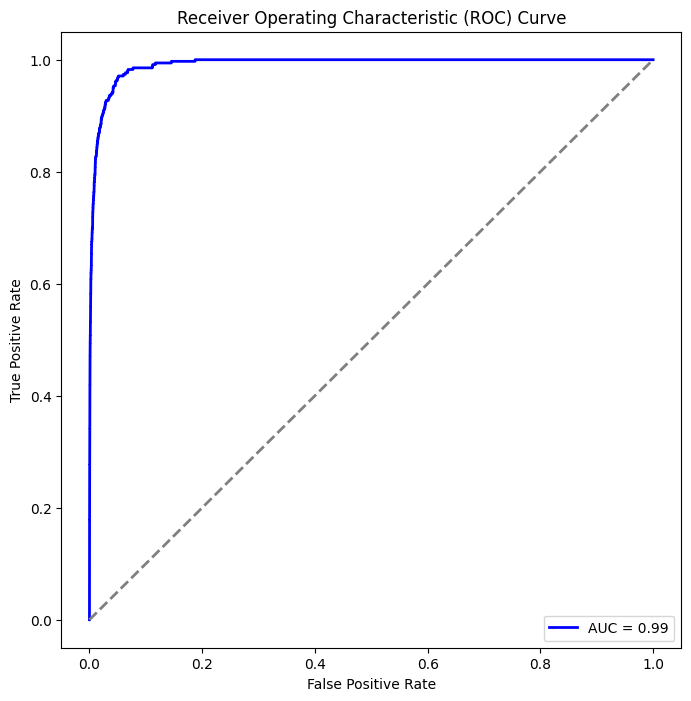

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and executed the previous code

# Get the predicted probabilities for the positive class
y_proba = svm.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [45]:
#Disease::DOID:1612 = breast cancer
import numpy as np
input2 = []
ddf = pd.DataFrame(columns=['compound', 'disease', 'label'])
for data in compound_disease_label:
    if data[1]=='Disease::DOID:1612': 
        input2.append(np.vstack([model.wv[data[0]], model.wv['Disease::DOID:1612']]).reshape(120,))
        ddf = pd.concat([ddf, pd.DataFrame({'compound': [data[0]], 'disease': ['Disease::DOID:1612'], 'label': 0})], ignore_index=True)

threshold = 0.3        
prediction = ((svm.predict_proba(input2)[:, 1]) > threshold).astype(int)

df = compound_disease[compound_disease['target'] == 'Disease::DOID:1612']
df['label'] = prediction

# 예측한 결과, 'label' 열 값이 1인 행 출력
selected_rows = df[df['label'] == 1]

# 정답 label이 1인 conpound 출력
rows = connected_compound_disease[connected_compound_disease['target']=='Disease::DOID:1612']
rows_list = rows['source'].tolist()

compound_list = []
for i in selected_rows['source']:
    if i not in rows_list:
        compound_list.append(i)

#에측결과에서 실제결과 값을 제외한 결과
nodes[nodes['id'].isin(compound_list)]

C:\Users\young\AppData\Local\Temp\ipykernel_16080\4116782115.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = prediction


,id,name,kind
13422,Compound::DB00367,Levonorgestrel,Compound
13438,Compound::DB00385,Valrubicin,Compound
13448,Compound::DB00396,Progesterone,Compound
13493,Compound::DB00444,Teniposide,Compound
13545,Compound::DB00499,Flutamide,Compound
13558,Compound::DB00515,Cisplatin,Compound
13581,Compound::DB00541,Vincristine,Compound
13593,Compound::DB00553,Methoxsalen,Compound
13658,Compound::DB00620,Triamcinolone,Compound
13673,Compound::DB00635,Prednisone,Compound


In [50]:
# 테스트 세트에 대한 예측 확률 얻기
y_probabilities = svm.predict_proba(input2)[:, 1]  # 1에 대한 예측 확률을 얻습니다.

# 'label_prob' 열에 예측 확률 추가
df['label_prob'] = y_probabilities.round(4)

# label_prob를 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='label_prob', ascending=False)

df_sorted

C:\Users\young\AppData\Local\Temp\ipykernel_16080\3555384283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_prob'] = y_probabilities.round(4)


,source,target,label,label_prob
149662,Compound::DB01248,Disease::DOID:1612,1,0.9364
116508,Compound::DB00997,Disease::DOID:1612,1,0.8908
64037,Compound::DB00603,Disease::DOID:1612,1,0.8849
58831,Compound::DB00563,Disease::DOID:1612,1,0.8826
130208,Compound::DB01101,Disease::DOID:1612,1,0.8822
...,...,...,...,...
182268,Compound::DB05013,Disease::DOID:1612,0,0.0000
41021,Compound::DB00423,Disease::DOID:1612,0,0.0000
181857,Compound::DB04948,Disease::DOID:1612,0,0.0000
41980,Compound::DB00430,Disease::DOID:1612,0,0.0000


In [51]:
# source 열의 값이 rows_list에 있는 행을 삭제
df_sorted = df_sorted[~df_sorted['source'].isin(rows_list)]

# label_prob 값이 큰 상위 10개의 행 출력
top_10_rows = df_sorted.nlargest(10, 'label_prob')
top_10_rows

,source,target,label,label_prob
87053,Compound::DB00773,Disease::DOID:1612,1,0.7456
112809,Compound::DB00970,Disease::DOID:1612,1,0.7322
68421,Compound::DB00635,Disease::DOID:1612,1,0.6994
82806,Compound::DB00741,Disease::DOID:1612,1,0.6735
55817,Compound::DB00541,Disease::DOID:1612,1,0.6706
120892,Compound::DB01030,Disease::DOID:1612,1,0.6702
43761,Compound::DB00444,Disease::DOID:1612,1,0.6183
98561,Compound::DB00860,Disease::DOID:1612,1,0.6151
37596,Compound::DB00396,Disease::DOID:1612,1,0.5935
150484,Compound::DB01254,Disease::DOID:1612,1,0.5915


In [52]:
top_10_rows['source'] = top_10_rows['source'].map(nodes.set_index('id')['name'])
top_10_rows['target'] = 'breast cancer'
top_10_rows

,source,target,label,label_prob
87053,Etoposide,breast cancer,1,0.7456
112809,Dactinomycin,breast cancer,1,0.7322
68421,Prednisone,breast cancer,1,0.6994
82806,Hydrocortisone,breast cancer,1,0.6735
55817,Vincristine,breast cancer,1,0.6706
120892,Topotecan,breast cancer,1,0.6702
43761,Teniposide,breast cancer,1,0.6183
98561,Prednisolone,breast cancer,1,0.6151
37596,Progesterone,breast cancer,1,0.5935
150484,Dasatinib,breast cancer,1,0.5915


In [49]:
# # top_10_rows를 CSV 파일로 저장
# top_10_rows.to_csv('svm_drug.csv', index=False)